#### Tecnicatura Universitaria en Automatización y Robótica - Inteligencia Computacional

# Guía de práctica - Lógica Difusa

## El problema del vehículo en la montaña con comando continuo

En esta guía debe desarrollar un controlador basado en lógica difusa para el problema del vehículo en la montaña con comando continuo.
El vehículo está ubicado en el medio de dos montañas. El desafío a cumplir es subir a la montaña de la derecha. Sin embargo, el motor del vehículo no posee la potencia necesaria para ascender en una sola pasada. Por lo tanto, debe establecer una estrategia de ida y vuelta para acumular la inercia suficiente que le permita subir.

---
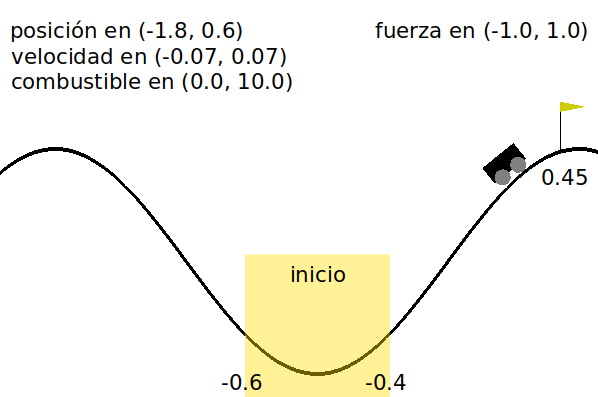

---

Al inicio, el vehículo tiene una posición entre -0.6 y -0.4, con velocidad nula y combustible en 10. El objetivo es alcanzar la montaña de la derecha (posición > 0.45 y velocidad positiva) en menos de 1000 instantes de tiempo. Con cada acción que realice el vehículo se consumirá parte del combustible, a mayor acción mayor consumo. Una vez agotado el combustible no podrá realizar ninguna fuerza. Por lo tanto, debe establecer la estrategia del controlador difuso para que realice fuerza en los momentos oportunos sin malgastar combustible.

El entorno de simulación le permite observar la posición, la velocidad y el combustible del vehículo en cada instante de tiempo. La acción posible es una fuerza para empujar el vehículo  a izquierda o derecha. Tanto en la gráfica como en la tabla de abajo se da más detalle de cada variable.

| Variable | Mín | Máx | Tipo | Valor inicial |
| -------- | --- | --- | ---- | ------------- |
| Posición | -1.8| 0.6 | float | aleatorio uniforme en (-0.6, -0.4) |
| Velocidad| -0.07 | 0.07 | float | 0 |
| Combustible | 0.0 | 10.0 | float | 10.0 |
| Fuerza | -1.0 | 1.0 | float | no aplica |


**Importante**: el entorno que simula el problema se encuentra en el archivo `tuar_mountain_car.py` y debe ubicarse en la misma carpeta que esta notebook para que funcione correctamente. 

El entorno está armado con el paquete `gym` y es una versión modificada de: https://gym.openai.com/envs/MountainCarContinuous-v0/

### Importación de las librerías necesarias

In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*show.*")
%matplotlib inline

In [ ]:
import numpy as np
import gym
import time
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Ejercicio 1 - Etapa de diseño

A partir de la descripción del problema se solicita que diseñe la interfaz del controlador difuso. Para ello deberá:
  
- **1.1** Definir cuales serán las variables de entrada del controlador y sus valores lingüisticos
- **1.2** Definir cuales serán las variables de salida del controlador y sus valores lingüísticos
- **1.3** Proponer un primer esquema de reglas

En estos tres puntos se pide que argumente el porqué de cada decisión, describiendo el razonamiento o la intuición que lo lleva a cada elección de variable y regla. Esta etapa es de diseño y por lo tanto NO involucra la implementación de la solución. Así mismo, no es obligación utilizar las variables observables como entradas del sistema de control difuso, podrían elegirse algunas variables y/o transformarlas antes del ingreso al controlador.

## Ejercicio 2 - Implementación de las variables y sus funciones de pertenencia

A partir de la descripción del problema y el diseño adoptado para el controlador difuso, se pide que:

- **2.1** Declare las variables de entrada y salida del controlador y sus universos de discurso correspondientes.
- **2.2** Implemente las funciones de pertenencias de los valores lingüísticos de las variables de entrada y de salida.
- **2.3** Grafique las funciones de pertenencia para las variables de entrada y de salida.

**IMPORTANTE**: Para este ejercicio y los siguientes deberá entregar el código (en esta misma notebook) de forma que se puedan reproducir los resultados. Se sugiere agregar comentarios donde sea necesario para facilitar la interpretación de lo codificado. Si lo considera necesario puede acompañar la notebook resuelta más algún otro documento en PDF.

## Ejercicio 3 - Implementación de las reglas y el sistema de control difuso

A partir de lo realizado en los ejercicios anteriores se pide que:

- **3.1** Implemente las reglas anteriormente diseñadas y utilizando las variables declaradas
- **3.2** Integre el controlador implementado anteriormente en un `ControlSystemSimulation` de `scikit-fuzzy` de forma que se le pueda ingresar valores de entradas y tener una acción de salida.
- **3.3** Cerciórese del correcto funcionamiento del controlador utilizando algún valor posible de entrada y obteniendo su salida. Si lo desea también puede graficar el cálculo de esa salida.

Concluído este ejercicio deberá tener un objeto del tipo `ControlSystemSimulation` al cual pueda ingresarle entradas numéricas y calcular la salida numérica utilizando las reglas definidas. 
Recién en ese momento estará en condiciones de abordar los siguientes ejercicios.

---

## Ejercicio 4 - Utilización del sistema de control difuso en el problema

Para utilizar el controlador se provee del código de la simulación, el cual Ud. deberá completar con la utilización e interacción con su sistema de control propuesto. En el código se exponen las variables observables posición, velocidad y combustible (`car_pos`, `car_vel` y `car_fuel`), las cuales usted debe transformar y adaptar a las entradas de su controlador. Luego de tomada una decisión de control, debe asignar un valor numérico a la variable de acción fuerza (`force_t`).

- **4.1** Implemente la interacción de su controlador con el escenario simulado.

In [ ]:
import tuar_mountain_car

# Aquí se registra el tipo de escenario. Ejecutar esta celda una sola vez
# Esta celda advierte que no se puede registrar más de una vez el mismo escenario
# Tengalo en cuenta si observa un error al ejecutarla
gym.register(
    id='TUARMountainCar-v100',
    entry_point=tuar_mountain_car.Continuous_MountainCarEnv,
    max_episode_steps=1000,
    reward_threshold=475.0,
)

# Genera el escenario del vehiculo en la montaña
envTUAR = gym.make('TUARMountainCar-v100')

In [ ]:
# Al ejecutar esta celda realiza una simulación (un episodio) sobre el escenario planteado

max_t = 1000  # Máximo tiempo de la simulación

# Inicializa el escenario para comenzar la simulación
observation = envTUAR.reset()
for t in range(max_t):
    # Dibuja el escenario en el estado actual
    envTUAR.render()

    # Tomo los datos de los sensores del vehiculo y el problema
    car_pos, car_vel, car_fuel = observation
    
    #
    # COMPLETAR con el uso del controlador
    #
    #

    force_t =  # COMPLETAR 

    print(f"En t = {t}: car_pos = {car_pos:.3f}, car_vel = {car_vel:0.3f}, "
          f"fuel = {fuel:0.3f}\t>  force_t = {force_t:0.3f}")

    # El modelo del vehículo acepta una lista con un solo elemento
    # dicho elemento es un float entre -1. y 1.
    action = [force_t]
    observation, reward, done, info = envTUAR.step(action)
    if done:
        print(f"Episode finalizado luego de {t+1} instantes")
        break

    time.sleep(0.05)

# Cierra la ventana del dibujo
envTUAR.close()

## Ejercicio 5 - Análisis de resultados

Para utilizar el controlador se provee del código de la simulación, el cual Ud. deberá completar con la utilización e interacción con su sistema de control propuesto. En el código se exponen las variables observables posición, velocidad y combustible (`pos_t`, `vel_t` y `fuel_t`), las cuales usted debe transformar y adaptar a las entradas de su controlador. Luego de tomada una decisión de control, debe asignar un valor numérico a la variable de acción fuerza (`force_t`).

- **5.1** Realice al menos 10 corridas del experimento y anote el resultado para cada corrida. Puede organizarlo en una tabla si lo desea. Las siguientes preguntas son orientativas para realizar el análisis.
  - ¿Qué sucedió? ¿Se alcanzó el objetivo?
  - ¿Por qué se obtuvo ese resultado?
  - ¿Las reglas funcionaron según lo esperado?
  - ¿Encontró alguna dificultad no prevista?
  - ¿Siempre finaliza de la misma manera el episodio?

## Ejercicio 6 - Realizar mejoras

- **6.1** ¿Cómo puede mejorar los resultados alcanzados? Proponga cambios al controlador originalmente propuesto (sin modificar el controlador original, agregue celdas por debajo de este ejercicio) y realice nuevos experimentos (se sugiere copiar la celda de la simulación). 

- **6.2** Analice los resultados de esta nueva propuesta.
- **6.3** Compare los resultados contra el controlador original y explique en que grado considera que se ha solucionado el problema.